# Problem statement

**In this notebook I will do EDA and be applying Machine Learning approaches for classifying whether a person is suffering from heart disease or not, using  Cleveland Heart Disease dataset**

**Data Dictionary for heart disease**

[Data Dictionary](https://drive.google.com/open?id=1UqC0SCeihRWr46_owtSOdsyzvA4k1lLV)

**Import library and data**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go

from sklearn import metrics

import eli5 #for purmutation importance
from eli5.sklearn import PermutationImportance
import shap #for SHAP values

from sklearn.metrics import accuracy_score



data=pd.read_csv('heart.csv')
data.head()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.

Using TensorFlow backend.


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
!pip3 install eli5
!pip3 install shap

     |████████████████████████████████| 112kB 2.8MB/s 
     |████████████████████████████████| 276kB 2.8MB/s 
  Created wheel for shap: filename=shap-0.35.0-cp36-cp36m-linux_x86_64.whl size=394149 sha256=04178df5220b2df3bd4eac316ec12ee6e0ef989cd4c51dc2ee0660a630bf58d0
  Stored in directory: /root/.cache/pip/wheels/e7/f7/0f/b57055080cf8894906b3bd3616d2fc2bfd0b12d5161bcb24ac
Successfully built shap


[Explanation of ST curve](https://drive.google.com/open?id=1SRj4vsBtKmv7G0rTNvd42BY6i9HWGIkW)

## EDA with DIS tool

**Important insights from DIS**

*   Dataset is slightly skewed towards target 1 class means in this dataset more people suffered with heart disease.



In [0]:
df1=data[(data['sex']==1) &(data['target']==1)]
df2=data[(data['sex']==0) & (data['target']==1)]

In [5]:
print('Male who had heart disease',df1.shape[0])
print('Female who had heart disease',df2.shape[0])

Male who had heart disease 93
Female who had heart disease 72


In [0]:
df3=data[(data['sex']==1) &(data['target']==0)]
df4=data[(data['sex']==0) & (data['target']==0)]

In [7]:
print('Male who dont had heart disease',df3.shape[0])
print('Female who did not had heart disease',df4.shape[0])

Male who dont had heart disease 114
Female who did not had heart disease 24


**Total males : 207**


**Total Females: 96**

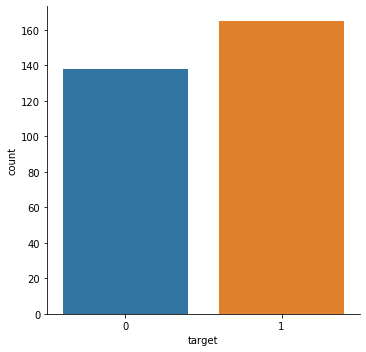

In [0]:
sns.catplot(x='target',kind='count',data=data)

**Positive and negative influences of features on target variables**

*   Target is postively influenced by cp, thalach, slope, restecg
*   Target is negatively influenced by Sex, Thal, Ca, Oldpeak, Exang



**Correlaton can be verified using correlation matrix**

---


**Correlation matrix**

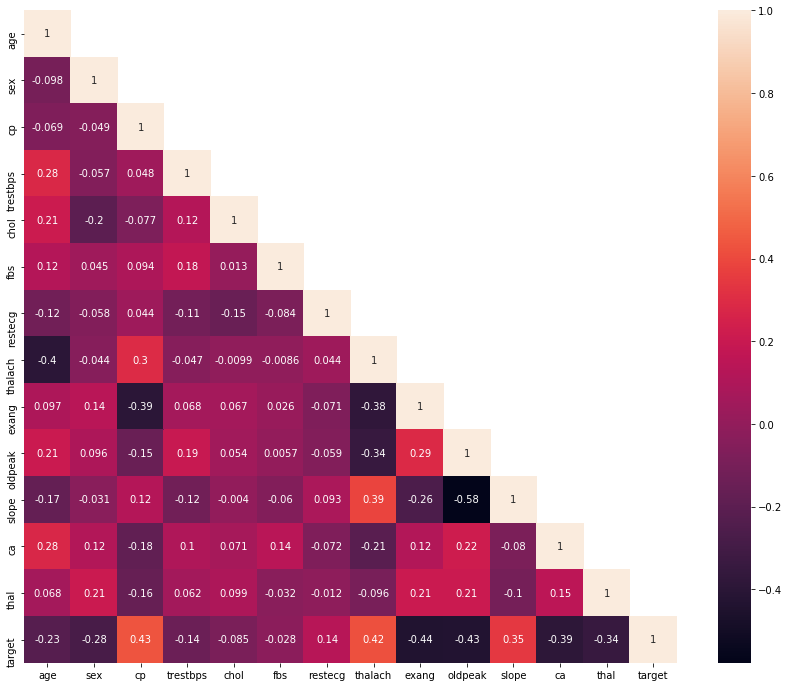

In [0]:
cor_mat = data[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig = plt.gcf()
fig.set_size_inches(15,12)
sns.heatmap(data=cor_mat, mask=mask, square=True, annot=True, cbar=True)

### Feature analysis using DIS

**Age**

Occurence of target=1 is more when user age is between 39 and 54

**Sex**

---



*   Sex=0 (Female) has highest target=1 rate
*   Sex=1 (Male) has lowest target=1 rate

**Target is negatively influenced by sex**



**Chest Pain**


*   0- typical angina
*   1- atypical angina
*   2- non- aginal pain
*   3- asymptomatic



* **CP=1 has highest target=1 rate**
* **CP=0 has lowest target =1 rate**

**trestbps**- Resting blood pressure.

---
Median for trestbps for target 1 is same as target 0


**chol**- persons cholestrol measurement

---
Occurence of target=1 is higher when chol value is between 170 and 250


**fbs** - person's fasting blood sugar 

---
fbs =0 has highest target=1 rate than fbs=1


**restecg**-resting electrocardiography measurement
*   restecg =1 has highest Target=1 rate (ST wave abnormality)
*   restecg= 2 has lowest Target=1 rate





**thalach**- max heart rate


*   Occurence of targe=1 is higher when thalach value is between 140 and 170
*   target positively influenced by thalach with corr 0.42
*   Important feature



**exang**- Exercise induced engina

---

exang=0 has highest target=1 than exang=1

**oldpeak**- ST depression induced

---


*   Occurence of target=1 becomes lesser when oldpeak value increases.





**slope**-the slope of peak exercise ST segment


---


*   Slope=2 has highest target=1 rate
*   Slope=1 has lowest target=1 rate




**ca**- number of major vessels


*   ca=4 has highest target=1 rate
*   ca=3 has lowest target=1 rate



**thal**- blood disorder


thal=2 has highest target=1 rate

## EDA without DIS tool

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [0]:
data.describe().round(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


**One duplicate row is present but we cannot remove because User ID is not present and two individual can have all these information same**

In [8]:
## Viewing the duplicate rows
duplicates_rows=data[data.duplicated()]
duplicates_rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [9]:
## Removing the duplicate rows
data = data.drop_duplicates(keep='first')
data.shape

(302, 14)

**No null value is present**

In [10]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Univariate analysis

**More number of people are having heart disease**

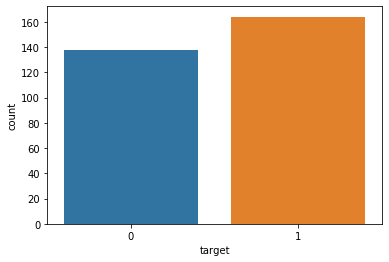

In [0]:
sns.countplot(x='target',data=data)
plt.show()

**Age column analysis**

In [0]:
print('Maximum age is',data['age'].max())
print('Minimum age is',data['age'].min())

Maximum age is 77
Minimum age is 29


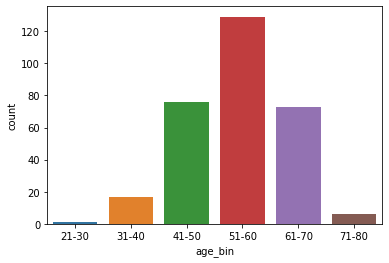

In [0]:
new_data=data.copy()
new_data['age_bin'] = pd.cut(new_data.age,[20,30,40,50,60,70,80],labels=['21-30','31-40','41-50','51-60','61-70','71-80'])
sns.countplot(x='age_bin', data=new_data)
plt.show()

**Sex column analysis**

1    206
0     96
Name: sex, dtype: int64

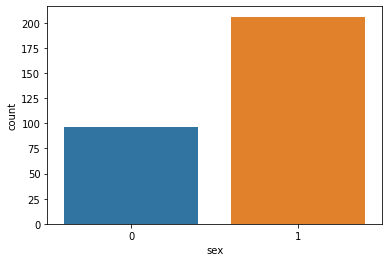

In [0]:
sns.countplot(x='sex',data=data)
data['sex'].value_counts()

**Chest pain**

* 0 = typical angina
* 1 = atypical angina
* 2 = non — anginal pain
* 3 = asymptotic


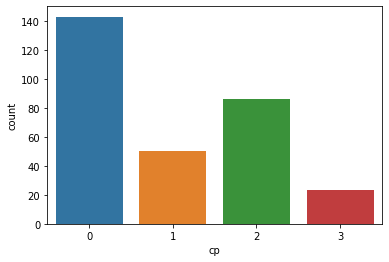

In [0]:
sns.countplot(x='cp',data=data)

**trestbps and cholestrol analysis**

---
**Skew of both variables**


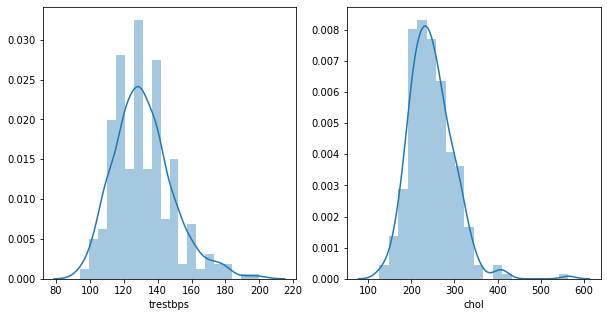

In [0]:
fig, ax =plt.subplots(1,2)
fig.set_size_inches(10, 5)
sns.distplot(data['trestbps'],hist=True,bins=20,ax=ax[0])
sns.distplot(data['chol'],hist=True,bins=20,ax=ax[1])
plt.show()

In [0]:
print('Skew of trestbps is',data['trestbps'].skew())
print('Skew of chol is',data['chol'].skew())

Skew of trestbps is 0.7165414326647318
Skew of chol is 1.147332413980798


**Analysis of fbs(Fasting blood sugar level)**

---
**Very less people have high fbs i.e >120 mg/dl**


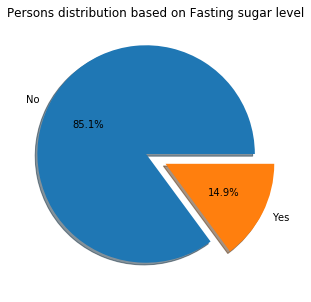

In [0]:
plt.figure(figsize=(5,5))
plt.pie(data.fbs.value_counts(),explode=(0.1,0.1),labels=['No','Yes'], autopct='%1.1f%%',shadow=True)
plt.title("Persons distribution based on Fasting sugar level")
plt.show()

**Analysis of restecg**

---



* 0 = normal
* 1 = having ST-T wave abnormality
* 2 = left ventricular hyperthrophy


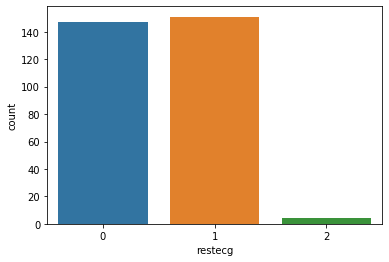

In [0]:
sns.countplot(x='restecg',data=data)

**Analysis of thalach max heart rate acheived**

---
**Analysis on exercise induced angina**


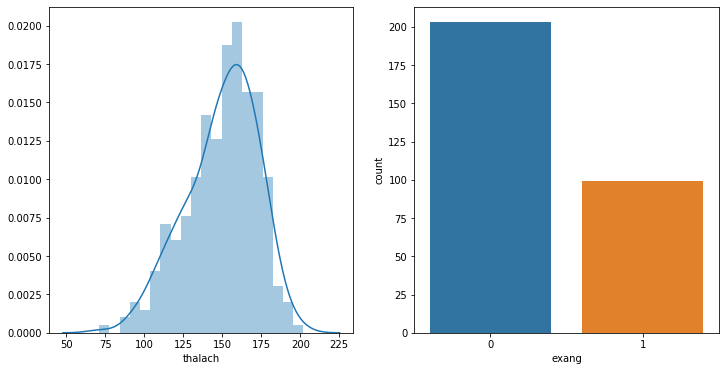

Skew of thalach is -0.5326712468229611


In [0]:
fig, ax =plt.subplots(1,2)
fig.set_size_inches(12, 6)
sns.distplot(data['thalach'],hist=True,bins=20,ax=ax[0])
sns.countplot(x='exang',data=data,ax=ax[1])
plt.show()
print('Skew of thalach is',data['thalach'].skew())

**oldpeak- ST depression induced by exercise**

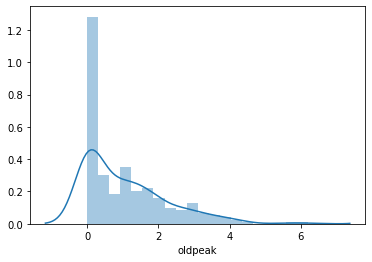

In [0]:
sns.distplot(data['oldpeak'],hist=True,bins=20)


**slope-The slope of peak exercise ST segemnt**

---

*  0 = upsloping
*  1 = flat
*  2 = downsloping

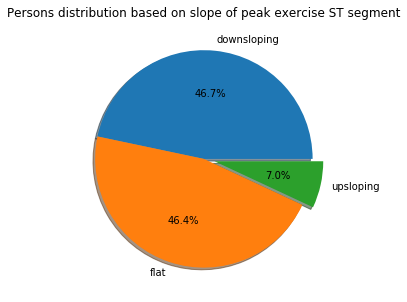

In [0]:
plt.figure(figsize=(5,5))
plt.pie(data.slope.value_counts(),explode=(0,0,0.1),labels=['downsloping','flat','upsloping'], autopct='%1.1f%%',shadow=True)
plt.title("Persons distribution based on slope of peak exercise ST segment")
plt.show()

**ca- the number of major vessels**

---

**thal- a blood disorder called thalassemia**
* 3 = normal
* 6 = fixed defect
* 7 = reversible defect

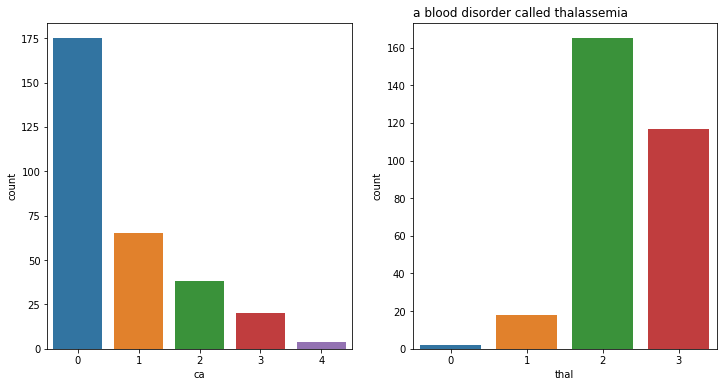

In [0]:
fig, ax =plt.subplots(1,2)
fig.set_size_inches(12, 6)
sns.countplot(x='ca',data=data,ax=ax[0])
plt.title('a blood disorder called thalassemia',loc='left')
sns.countplot(x='thal',data=data,ax=ax[1])
plt.show()

### Bivariate analysis

**Chest pain**

* 0 = typical angina
* 1 = atypical angina
* 2 = non — anginal pain
* 3 = asymptotic

**Here we can see that for each age groups most people have typical angina pain**

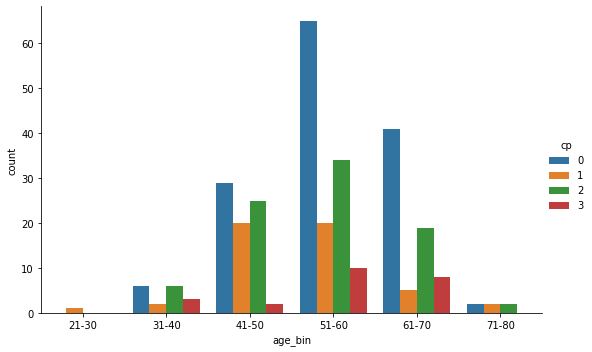

In [0]:
sns.catplot(x='age_bin',hue='cp',data=new_data,kind='count',aspect=1.5,)

In [0]:
def general_func(data,agg1,agg2,legend1,legend2,scatter_name):

  df1 = data[(data[agg1] == 1)]
  df2 = data[(data[agg1] == 0)]
  df3 = pd.DataFrame(pd.crosstab(data[agg2],data[agg1]))
  df3['For target= 1%'] = df3[1] / (df3[1] + df3[0]) * 100      
  df3 = df3.sort_values(1, ascending = False)
  
  trace1 = go.Bar(
      x=df1[agg2].value_counts().keys().tolist(),
      y=df1[agg2].value_counts().values.tolist(),
      text=df1[agg2].value_counts().values.tolist(),
      textposition = 'auto',
      name=f'{str(legend1)} : 1',opacity = 0.8, marker=dict(
      color='Red',
      line=dict(color='#000000',width=1)))

  trace2 = go.Bar(
      x=df2[agg2].value_counts().keys().tolist(),
      y=df2[agg2].value_counts().values.tolist(),
      text=df2[agg2].value_counts().values.tolist(),
      textposition = 'auto',
      name=f'{str(legend2)} : 0', opacity = 0.8, marker=dict(
      color='Green',
      line=dict(color='#000000',width=1)))
      
  trace3 =  go.Scatter(   
      x=df3.index,
      y=df3['For target= 1%'],
      yaxis = 'y2',
      name=f'{str(agg1)}', opacity = 0.6, marker=dict(
      color='black',
      line=dict(color='#000000',width=0.5
      )))

  layout = dict(title =f'{str(agg1)} v/s {str(agg2)}',  autosize = False,
                      height  = 500,
                      width   = 800,
            xaxis=dict(title =f'{str(agg2)}'),
            barmode="stack", 
            yaxis=dict(title= 'Count'), 
            yaxis2=dict(range= [-0, 100], 
                        overlaying= 'y', 
                        anchor= 'x',
                        side= 'right',
                        zeroline=False,
                        showgrid= False, 
                        title= f'{str(scatter_name)}'
                        ))

  fig = go.Figure(data=[trace2, trace1, trace3], layout=layout)
  py.iplot(fig)


**Men has little more tendency for high sugar in blood**

In [0]:
general_func(data,'fbs','sex','High blood sugar','Normal blood sugar','blood sugar percent')

**Exercise induced angina is more in males than females**

In [0]:
general_func(data,'exang','sex','Exercise induced angina','Exercise induced angina','angina percent')

**By plotting count plot of age-bins and had heart disease count**

---
**People between 41-50 age and between 71-80 years of age has more chance of heart disease**


In [0]:
general_func(new_data,'target','age_bin','Had heart disease','Do not had heart disease','Disease percent')

**Surprisingly female is less than males but percentage of heart disease in female is more than in males**

In [0]:
general_func(data,'target','sex','Had heart disease','Do not had heart disease','Disease percent')

**Chest pain**

* 0 = typical angina
* 1 = atypical angina
* 2 = non — anginal pain
* 3 = asymptotic

---

**Clearly seen chest pain of type zero has very less percentage of having heart disease**


In [0]:
general_func(data,'target','cp','Had heart disease','Do not had heart disease','Disease percent')

**High cholestrol level increaes the chances of heart disease**

In [0]:
print(data.chol.max())
print(data.chol.min())

564
126


In [0]:
new_data['chol_bin'] = pd.cut(new_data.chol,[100,150,200,250,300,350,400,450,500,550,600],labels=['100-150','151-200','201-250','251-300','301-350','351-400','401-450','451-500','501-550','551-600'])

In [0]:
general_func(new_data,'target','chol_bin','Had heart disease','Do not had heart disease','Disease percent')

**Persons resting blood pressure**

---

**Clearly seen as blood pressure increases percentage of having heart disease increases**

In [0]:
print(data.trestbps.max())
print(data.trestbps.min())

200
94


In [0]:
new_data['trestbps_bin'] = pd.cut(new_data.thalach,[90,120,150,180,210],labels=['90-120','121-150','151-180','181-210'])

In [0]:
general_func(new_data,'target','trestbps_bin','Had heart disease','Do not had heart disease','Disease percent')

**Person's fasting blood sugar level**

---
**Doesn't affect chances of getting heart disease**


In [0]:
general_func(data,'target','fbs','Had heart disease','Do not had heart disease','Disease percent')

* 0 = normal
* 1 = having ST-T wave abnormality
* 2 = left ventricular hyperthrophy

In [0]:
general_func(data,'target','restecg','Had heart disease','Do not had heart disease','Disease percent')

**thalach(Max heartrate acheived)**

---

**Clearly seen if max heart rate acheived is low chances of heart disease is very low**

**If maximum heart rate acheived is greater than 160 chances of heart disease is very high**

In [0]:
print(data.thalach.max())
print(data.thalach.min())

202
71


In [0]:
new_data['thalach_bin'] = pd.cut(new_data.thalach,[70,100,130,160,190,210],labels=['70-100','101-130','131-160','161-190','191-210'])

In [0]:
general_func(new_data,'target','thalach_bin','Had heart disease','Do not had heart disease','Disease percent')

**Exercise induced angina**

---

**If no angina chances more are of heart attack**

In [0]:
general_func(data,'target','exang','Had heart disease','Do not had heart disease','Disease percent')

**slope-The slope of peak exercise ST segemnt**

---

*  0 = upsloping
*  1 = flat
*  2 = downsloping

---

**If ST segment downsloping chances of heart disease is very high**

In [0]:
general_func(data,'target','slope','Had heart disease','Do not had heart disease','Disease percent')

**Number of major blood vessels**

In [0]:
general_func(data,'target','ca','Had heart disease','Do not had heart disease','Disease percent')

**A blood disorder called thalassemia**

In [0]:
general_func(data,'target','thal','Had heart disease','Do not had heart disease','Disease percent')

## Modelling

In [0]:
## Converting all the categorical features from int to category
col_to_be_categorical=['sex','cp','fbs','restecg','exang','slope','ca','thal']
for cat in col_to_be_categorical:
  data[cat]=pd.Categorical(data[cat])

In [0]:
X=data.drop(['target'],axis=1)
Y=data['target']

In [13]:
X= pd.get_dummies(X, drop_first=True)
X.head()

,age,trestbps,chol,thalach,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0


In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=0)

In [24]:
x_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
74,43,0,2,122,213,0,1,165,0,0.2,1,0,2
153,66,0,2,146,278,0,0,152,0,0.0,1,1,2
64,58,1,2,140,211,1,0,165,0,0.0,2,0,2
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3


### Logistic regression

In [25]:
#fitting the logistic regression model to the dataset
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

classifier=LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**creating y_pred column for mlis**

In [0]:
#predicting the result
y_pred=classifier.predict(x_test)
y_pred_to_use=pd.Series(y_pred)
frame={'y_pred':y_pred}
y_pred_df=pd.DataFrame(frame)
# y_pred_to_use=pd.Series(y_pred_df)
y_pred_df.index = y_test.index

In [0]:
#making the confusion matrix to see many correct prediction is made by our model
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

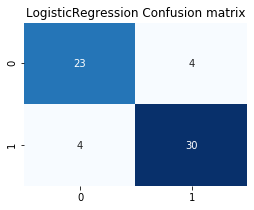

In [31]:
plt.figure(figsize=(4,3))
plt.title("LogisticRegression Confusion matrix")
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False)
plt.show()

[Confusion matrix](https://drive.google.com/open?id=1Lvu-PxI5g_S3_z7PrSjzsPaQHA1Q9v9K)

**Here Type II error is less which is good**

In [0]:
def get_model_metrics(actual,predicted):
    confusion = metrics.confusion_matrix(actual,predicted )
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    accuracy=metrics.accuracy_score(actual,predicted)
    sensitivity = TP / float(TP+FN)
    specificity = TN / float(TN+FP)
    precision=TP/float(FP+TP)
    recall=TP/float(FN+TP)
    precision=metrics.precision_score(actual,predicted)
    recall=metrics.recall_score(actual,predicted)
    f1=metrics.f1_score(actual,predicted, average='weighted') 
    print('************************************************')
    print("Accuracy    : "+str(round(accuracy,2)*100),'%')
    print("Sensitivity : "+str(round(sensitivity,2)))
    print("Specificity : "+str(round(specificity,2)))
    print("Precision   : "+str(round(precision,2)))
    print("Recall      : "+str(round(recall,2)))
    print("F1_score    : "+str(round(f1,2)))
    print('************************************************')


In [34]:
get_model_metrics(y_test,y_pred)

************************************************
Accuracy    : 87.0 %
Sensitivity : 0.88
Specificity : 0.85
Precision   : 0.88
Recall      : 0.88
F1_score    : 0.87
************************************************


**Using K-fold cross validation**

In [0]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)

accuracies=pd.DataFrame(accuracies)

In [36]:
print('Mean of all the accuracy',accuracies.mean())

print(accuracies)

Mean of all the accuracy 0    0.826
dtype: float64
          0
0  0.760000
1  0.708333
2  0.833333
3  0.875000
4  0.958333
5  0.750000
6  0.958333
7  0.750000
8  0.833333
9  0.833333


**Exporting the files for MLIS**

In [0]:
import pickle
filename = 'logistic_regression_model_heart_new.mdl'
pickle.dump(classifier, open(filename, 'wb'))

In [0]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=0)

traning_dataset=pd.concat([x_train, y_train], axis=1)

prediction_dataset=pd.concat([x_test,y_test,y_pred_df],axis=1)

traning_dataset=traning_dataset.reset_index()
prediction_dataset=prediction_dataset.reset_index()

traning_dataset.index.name = 'Ind'
prediction_dataset.index.name = 'Ind'

traning_dataset=traning_dataset.drop(['index'],axis=1)
prediction_dataset=prediction_dataset.drop(['index'],axis=1)


traning_dataset.to_csv('traning_dataset_heart_new.csv')
prediction_dataset.to_csv('prediction_dataset_heart_new.csv')

### Random forest classification

In [0]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


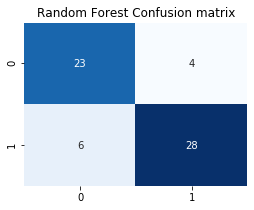

In [0]:
plt.figure(figsize=(4,3))
plt.title("Random Forest Confusion matrix")
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False)
plt.show()

**Accuracy**

In [0]:
acc=accuracy_score(y_pred,y_test)
print('Random forest accuracy:\t',acc*100,'%')

Random forest accuracy:	 83.60655737704919 %


In [0]:
get_model_metrics(y_test,y_pred)

************************************************
Accuracy    : 84.0 %
Sensitivity : 0.82
Specificity : 0.85
Precision   : 0.88
Recall      : 0.82
F1_score    : 0.84
************************************************


In [0]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)
print('Mean of all the accuracy',accuracies.mean())

accuracies=pd.DataFrame(accuracies)
print(accuracies)

Mean of all the accuracy 0.7886666666666666
          0
0  0.720000
1  0.708333
2  0.833333
3  0.791667
4  0.833333
5  0.791667
6  0.875000
7  0.750000
8  0.791667
9  0.791667


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


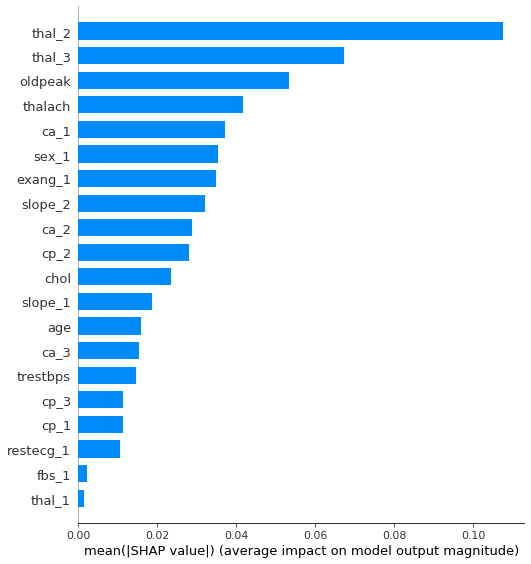

In [0]:
explainer = shap.TreeExplainer(classifier)
shap_values = explainer.shap_values(x_test)

shap.summary_plot(shap_values[1], x_test, plot_type="bar")

In [0]:
import pickle
filename = 'random_forest_heart_new2.mdl'
pickle.dump(classifier, open(filename, 'wb'))

### Knn classification

**Feature sclaing is needed for knn classification because it is a distance based algorithms are affected by the scale of the variables.**

In [0]:
#Apply feature Scaling
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)

In [0]:
#fitting the knn classifier model to the dataset
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(x_train,y_train)

#predicting the result
y_pred=classifier.predict(x_test)

#making the confusion matrix to see many correct prediction is made by our model
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

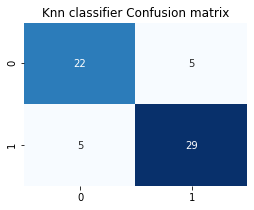

In [0]:
plt.figure(figsize=(4,3))
plt.title("Knn classifier Confusion matrix")
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False)
plt.show()

In [0]:
get_model_metrics(y_test,y_pred)

************************************************
Accuracy    : 84.0 %
Sensitivity : 0.85
Specificity : 0.81
Precision   : 0.85
Recall      : 0.85
F1_score    : 0.84
************************************************


In [0]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)
print('Mean of all the accuracy',accuracies.mean())

accuracies=pd.DataFrame(accuracies)
print(accuracies)

Mean of all the accuracy 0.8053333333333332
          0
0  0.720000
1  0.708333
2  0.833333
3  0.833333
4  0.916667
5  0.791667
6  0.875000
7  0.750000
8  0.833333
9  0.791667


### XGBoost classifier

In [0]:
# Fitting XGBoost to the Training set
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
classifier = XGBClassifier(max_depth=10,learning_rate=0.5)
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [0]:
#predicting the result
y_pred=classifier.predict(x_test)
y_pred_to_use=pd.Series(y_pred)
frame={'y_pred':y_pred}
y_pred_df=pd.DataFrame(frame)
# y_pred_to_use=pd.Series(y_pred_df)
y_pred_df.index = y_test.index

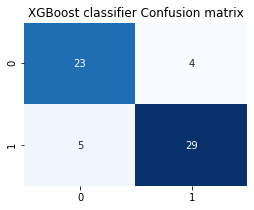

In [0]:
plt.figure(figsize=(4,3))
plt.title("XGBoost classifier Confusion matrix")
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False)

In [0]:
get_model_metrics(y_test,y_pred)

************************************************
Accuracy    : 85.0 %
Sensitivity : 0.85
Specificity : 0.85
Precision   : 0.88
Recall      : 0.85
F1_score    : 0.85
************************************************


In [0]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)
print('Mean of all the accuracy',accuracies.mean())

accuracies=pd.DataFrame(accuracies)
print(accuracies)

Mean of all the accuracy 0.8009999999999999
          0
0  0.760000
1  0.750000
2  0.708333
3  0.791667
4  0.833333
5  0.750000
6  0.916667
7  0.750000
8  0.916667
9  0.833333


In [0]:
import pickle
filename = 'xgboost_modelnew.mdl'
pickle.dump(classifier, open(filename, 'wb'))

### LGBM

In [0]:
import lightgbm as ltb


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


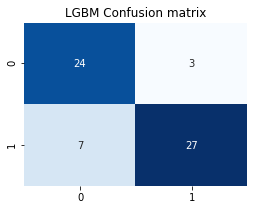

In [0]:
#fit a lightGBM model to the data
classifier = ltb.LGBMClassifier()
classifier.fit(x_train, y_train)
print(); print(classifier)
y_pred = classifier.predict(x_test)
    
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4,3))
plt.title("LGBM Confusion matrix")
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False)
plt.show()

**Creating the y_pred column for mlis**

In [0]:
#predicting the result
y_pred=classifier.predict(x_test)
y_pred_to_use=pd.Series(y_pred)
frame={'y_pred':y_pred}
y_pred_df=pd.DataFrame(frame)
# y_pred_to_use=pd.Series(y_pred_df)
y_pred_df.index = y_test.index

**Accuracy**

In [0]:
acc=accuracy_score(y_pred,y_test)
print('LGBM accuracy:\t',acc*100)

LGBM accuracy:	 83.60655737704919


In [0]:
get_model_metrics(y_test,y_pred)

************************************************
Accuracy    : 84.0 %
Sensitivity : 0.79
Specificity : 0.89
Precision   : 0.9
Recall      : 0.79
F1_score    : 0.84
************************************************


In [0]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)
print('Mean of all the accuracy',accuracies.mean())

accuracies=pd.DataFrame(accuracies)
print(accuracies)

Mean of all the accuracy 0.8008333333333333
          0
0  0.800000
1  0.708333
2  0.791667
3  0.791667
4  0.875000
5  0.750000
6  0.833333
7  0.833333
8  0.833333
9  0.791667


In [0]:
import pickle
filename = 'LGBM_model_heart_new.mdl'
pickle.dump(classifier, open(filename, 'wb'))

In [0]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=0)

traning_dataset=pd.concat([x_train, y_train], axis=1)

prediction_dataset=pd.concat([x_test,y_test,y_pred_df],axis=1)

traning_dataset=traning_dataset.reset_index()
prediction_dataset=prediction_dataset.reset_index()

traning_dataset.index.name = 'Ind'
prediction_dataset.index.name = 'Ind'

traning_dataset=traning_dataset.drop(['index'],axis=1)
prediction_dataset=prediction_dataset.drop(['index'],axis=1)


traning_dataset.to_csv('traning_dataset_heart_new.csv')
prediction_dataset.to_csv('prediction_dataset_heart_new.csv')

Setting feature_perturbation = "tree_path_dependent" because no background data was given.
LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


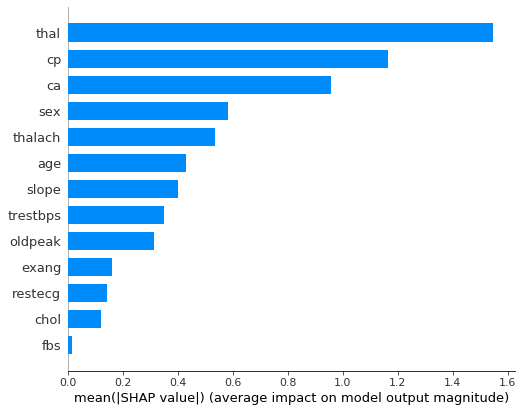

In [0]:
explainer = shap.TreeExplainer(classifier)
shap_values = explainer.shap_values(x_test)

shap.summary_plot(shap_values[1], x_test, plot_type="bar")

### Catboost classifier

In [0]:
!pip3 install catboost

In [0]:
from catboost import CatBoostClassifier

classifier = CatBoostClassifier()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)
print(accuracies)
print(accuracies.mean())
print(accuracies.std())

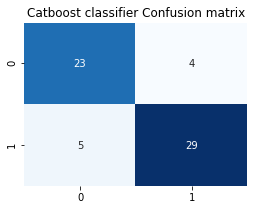

In [0]:
plt.figure(figsize=(4,3))
plt.title("Catboost classifier Confusion matrix")
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False)

In [0]:
acc=accuracy_score(y_pred,y_test)
print('Catboost accuracy:\t',acc*100)

Catboost accuracy:	 85.24590163934425


In [0]:
get_model_metrics(y_test,y_pred)

************************************************
Accuracy    : 85.0 %
Sensitivity : 0.85
Specificity : 0.85
Precision   : 0.88
Recall      : 0.85
F1_score    : 0.85
************************************************


In [0]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)
print(accuracies.mean())

accuracies=pd.DataFrame(accuracies)
print(accuracies)

Streaming output truncated to the last 5000 lines.
17:	learn: 0.6347823	total: 24.8ms	remaining: 1.35s
18:	learn: 0.6316217	total: 26ms	remaining: 1.34s
19:	learn: 0.6288460	total: 27.3ms	remaining: 1.34s
20:	learn: 0.6260270	total: 28.8ms	remaining: 1.34s
21:	learn: 0.6230942	total: 30.1ms	remaining: 1.34s
22:	learn: 0.6199712	total: 31.5ms	remaining: 1.34s
23:	learn: 0.6178707	total: 32.4ms	remaining: 1.32s
24:	learn: 0.6152738	total: 33.7ms	remaining: 1.31s
25:	learn: 0.6127182	total: 35ms	remaining: 1.31s
26:	learn: 0.6103738	total: 36.3ms	remaining: 1.31s
27:	learn: 0.6073409	total: 37.7ms	remaining: 1.31s
28:	learn: 0.6048926	total: 39.2ms	remaining: 1.31s
29:	learn: 0.6025931	total: 40.5ms	remaining: 1.31s
30:	learn: 0.5997025	total: 41.7ms	remaining: 1.3s
31:	learn: 0.5974210	total: 43ms	remaining: 1.3s
32:	learn: 0.5950992	total: 44.4ms	remaining: 1.3s
33:	learn: 0.5928327	total: 45.9ms	remaining: 1.3s
34:	learn: 0.5910094	total: 47.1ms	remaining: 1.3s
35:	learn: 0.5881009	tot

### Elastic net

In [0]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score
import matplotlib

In [0]:
elastic = ElasticNet(alpha=0.0005, l1_ratio=0.9)

In [0]:
y_pred= elastic.fit(x_train, y_train).predict(x_test)

In [0]:
pred_new=[]
for i in y_pred:
  if i>0.5:
    pred_new.append(1)
  else:
    pred_new.append(0)

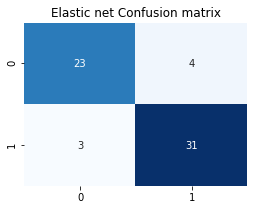

In [0]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred_new)
plt.figure(figsize=(4,3))
plt.title("Elastic net Confusion matrix")
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False)

In [0]:
acc=accuracy_score(y_test,pred_new)
print('Elastic net accuracy:\t',acc*100)

Elastic net accuracy:	 88.52459016393442


In [0]:
get_model_metrics(y_test,pred_new)

************************************************
Accuracy    : 89.0 %
Sensitivity : 0.91
Specificity : 0.85
Precision   : 0.89
Recall      : 0.91
F1_score    : 0.88
************************************************


In [0]:
coef = pd.Series(elastic.coef_, index = x_test.columns)

In [0]:
print("Elastic Net picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Elastic Net picked 21 variables and eliminated the other 1 variables


In [0]:
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

21 features, reduction of 4.55%


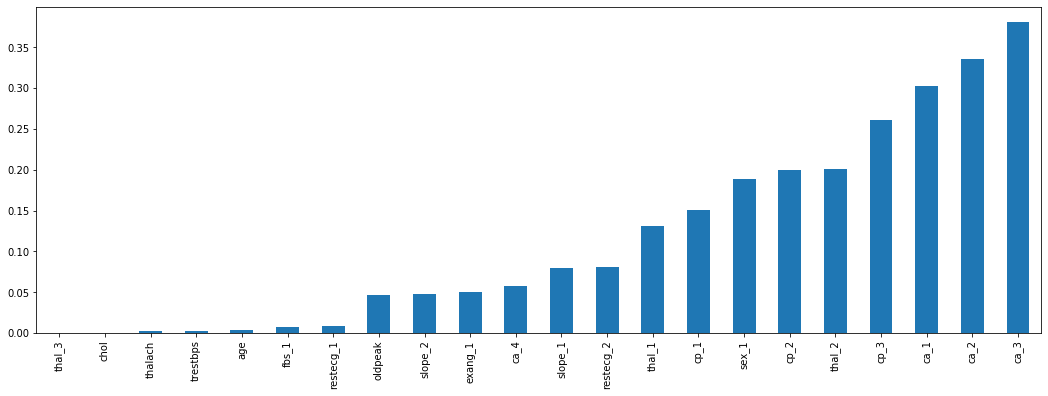

In [0]:
feature_importance = pd.Series(index = x_train.columns, data = np.abs(elastic.coef_))

n_selected_features = (feature_importance>0).sum()
print('{0:d} features, reduction of {1:2.2f}%'.format(
    n_selected_features,(1-n_selected_features/len(feature_importance))*100))

feature_importance.sort_values().tail(30).plot(kind = 'bar', figsize = (18,6))
plt.show()

In [0]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = elastic, X = x_train, y = y_train, cv = 10)
print(accuracies.mean())

accuracies=pd.DataFrame(accuracies)
print(accuracies)

0.4827358525517105
          0
0  0.358352
1  0.285167
2  0.501050
3  0.392326
4  0.690741
5  0.423730
6  0.629769
7  0.377377
8  0.656985
9  0.511861


**From the above many modelling techniques:**

---

**Logistic Regression and Catboost performed comparatively better with respect to others**